### Chains

a chain is a sequence of calls, whether those calls are to LLMs, external tools, or data preprocessing steps.

Chains enable you to go beyond simple LLM interactions; they allow you to construct pipelines that combine different models and functionalities (External data, external API calls).
By chaining components, you create powerful applications that can leverage the strengths of LLMs or integrate external data and services.

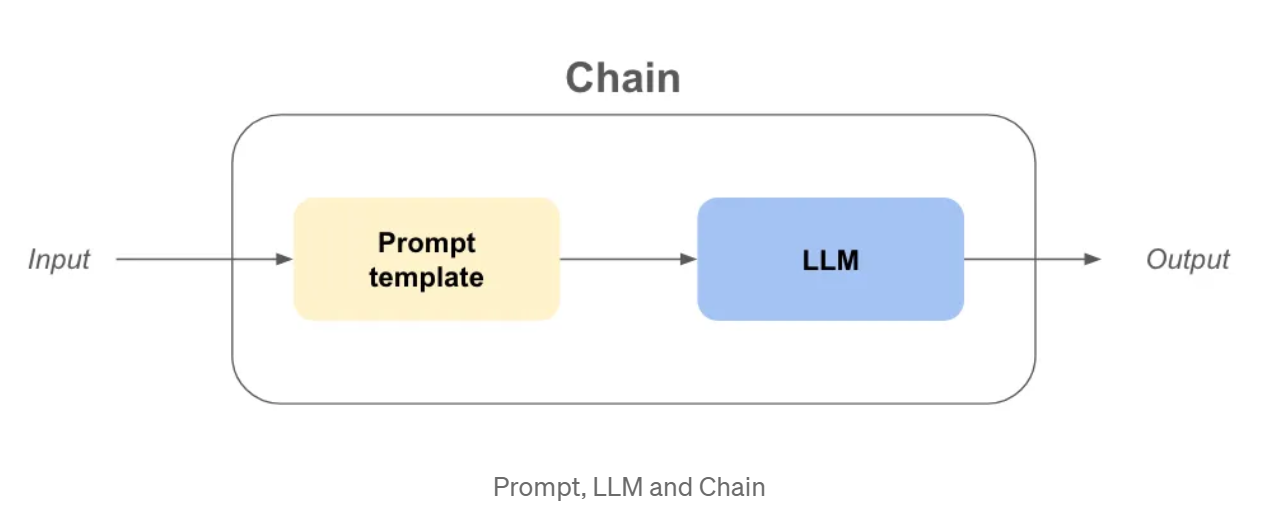

### Load LLM Model

In [21]:
from dotenv import load_dotenv
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_google_genai import ChatGoogleGenerativeAI
# from langchain_openai import ChatOpenAI
import os

load_dotenv()

# model = ChatOpenAI(model = "gpt-4o")

# Access the API key from the environment
api_key = os.getenv("GOOGLE_GEN_API")
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro", api_key=api_key)

### Generate Prompt Template

In [22]:
prompt_template = ChatPromptTemplate.from_messages(
    [
        ("system", "You will provide information about {topic}"),
        ("human", "tell me visisting place, best foods, culture, education of {city}"),
    ]
)
prompt_template.invoke({"topic": "place", "city": "Tangail"})

ChatPromptValue(messages=[SystemMessage(content='You will provide information about place', additional_kwargs={}, response_metadata={}), HumanMessage(content='tell me visisting place, best foods, culture, education of Tangail', additional_kwargs={}, response_metadata={})])

### Create Simple Chain

In [23]:
Chain = prompt_template | llm | StrOutputParser()
result = Chain.invoke({"topic": "place", "city": "Tangail"})
print(result)

## Tangail: A Journey Through History, Nature, and Culture

Tangail, a district nestled in the heart of Bangladesh, offers a unique blend of historical significance, natural beauty, and rich cultural heritage. Let's explore what makes it a worthwhile visit:

**Visiting Places:**

* **Atia Jame Mosque:** This architectural marvel from the Mughal era boasts intricate terracotta designs and a serene ambiance.
* **Mahera Zamindar House:**  Step back in time at this grand palace, showcasing the opulent lifestyle of Bengali landlords.
* **Pakutia Zamindar Bari:**  Another stunning example of Zamindar architecture, with beautiful gardens and a fascinating history.
* **Dhanbari Nawab Palace:** Explore the ruins of this once magnificent palace, whispering tales of a bygone era.
* **Nagarpur National Park:**  Escape into nature's embrace at this sanctuary, home to diverse flora and fauna, including deer, monkeys, and various bird species.
* **Ekrampur Zamindar Bari:** Witness the fusion of Mugha

In [24]:
Chain = prompt_template | llm | StrOutputParser()
result = Chain.invoke({"topic": "place", "city": "Dhaka"})
print(result)

## Dhaka: A City of History, Culture, and Delicious Food

Dhaka, the bustling capital of Bangladesh, offers a vibrant mix of history, culture, and modernity. Here's a glimpse into what makes Dhaka a fascinating place to visit:

**Visiting Places:**

* **Historical Sites:**
    * **Lalbagh Fort:** A 17th-century Mughal fort showcasing stunning architecture and a tragic love story.
    * **Ahsan Manzil:**  A grand pink palace, once home to the Dhaka Nawab family, now a museum showcasing their opulent lifestyle.
    * **Parliament House (Jatiyo Sangsad Bhaban):** An architectural marvel designed by Louis Kahn, offering guided tours.
    * **Sadarghat:** The busiest river port in the world, offering a glimpse into the daily lives of locals and a chance to ride a traditional wooden boat. 
    * **Dhakeshwari Temple:** An important Hindu temple and a significant historical landmark.

* **Cultural Experiences:**
    * **Bangladesh National Museum:** Explore the rich history and heritage of Ba

### Under the Hood of Chain

RunnableLambda is a utility in LangChain used to wrap simple functions or lambdas so they can be used as steps in a chain or sequence. It allows you to transform individual functions (like formatting prompts, invoking models, or parsing outputs) into components that can be run sequentially or in parallel within LangChain’s pipeline.

RunnableSequence is used to chain multiple steps (or runnables) together, ensuring that the output of one step is passed as the input to the next step. This allows you to build pipelines where each step sequentially processes data.

In [25]:
from langchain_core.runnables import RunnableLambda, RunnableSequence


# Define prompt templates
prompt_template = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a comedian who tells jokes about {topic}."),
        ("human", "Tell me {joke_count} jokes."),
    ]
)


# Create individual runnables (steps in the chain)
format_prompt = RunnableLambda(lambda x: prompt_template.format_prompt(**x))
invoke_model = RunnableLambda(lambda x: llm.invoke(x.to_messages()))
parse_output = RunnableLambda(lambda x: x.content)

# Create the RunnableSequence (equivalent to the LCEL chain)
chain = RunnableSequence(first=format_prompt, middle=[invoke_model], last=parse_output)

# Run the chain
response = chain.invoke({"topic": "education", "joke_count": 3})

# Output
print(response)

Alright, here's some schoolyard humor, fresh out the ol' textbook:

1. **Why did the music notes get detention?** 
   **They were caught hanging out in the staff room!**

2. **You know, I just got back from a parent-teacher conference...**
   **Turns out, my kid's got a real problem with fractions. I told the teacher, "Well, I've got 7 of the little rascals – what's one more?"**

3. **Why don't they play poker in the jungle?** 
   **Too many cheetahs!** 

Don't forget to tip your waitress. I'm here all week!  Or, at least until the bell rings. 



In [26]:
from langchain.schema import HumanMessage, SystemMessage

# Step 1: Format the prompt (input is a dictionary with topic and count)
format_prompt = RunnableLambda(lambda x: f"Generate {x['joke_count']} jokes about {x['topic']}.")

# Step 2: Keyword checker (check if the topic is valid, else raise an error)
check_topic = RunnableLambda(lambda x: x if x.lower().find("lawyers") != -1 else "Invalid topic. Use 'lawyers'.")

# Step 3: Convert the prompt to uppercase
uppercase_prompt = RunnableLambda(lambda x: x.upper())

# Step 4: Add an extra phrase to the prompt (e.g., "Let's get started with some jokes!")
add_phrase = RunnableLambda(lambda x: x + " LET'S GET STARTED WITH SOME JOKES!")

# Step 5: Convert the string into a message format for the model
to_messages = RunnableLambda(lambda x: [SystemMessage(content="Tell jokes"), HumanMessage(content=x)])

# Step 6: Dummy model invocation (Here, we simulate a model's response as a string)
invoke_model = RunnableLambda(lambda x: llm.invoke(x))

# Step 7: Parse the output from the model's response
parse_output = RunnableLambda(lambda x: x.content)

# Create the RunnableSequence
chain = RunnableSequence(
    first=format_prompt,
    middle=[check_topic, uppercase_prompt, add_phrase, to_messages, invoke_model],
    last=parse_output
)

# Input for the chain
input_data = {"topic": "lawyers", "joke_count": 3}

# Run the chain
response = chain.invoke(input_data)

# Output the response
print(f"Response from the AI: {response}")


Response from the AI: Alright, here are three jokes about lawyers, ready for your discerning legal humor needs: 

1. **Why don't sharks attack lawyers?** 
   >  Professional courtesy. 

2. **How can one lawyer always go right ahead of you in court?**
   > They're your client.

3. **What's the difference between a good lawyer and a bad lawyer?**
   > A bad lawyer makes your case drag on for years. A good lawyer knows how to make it last even longer. 



### Types of Chain

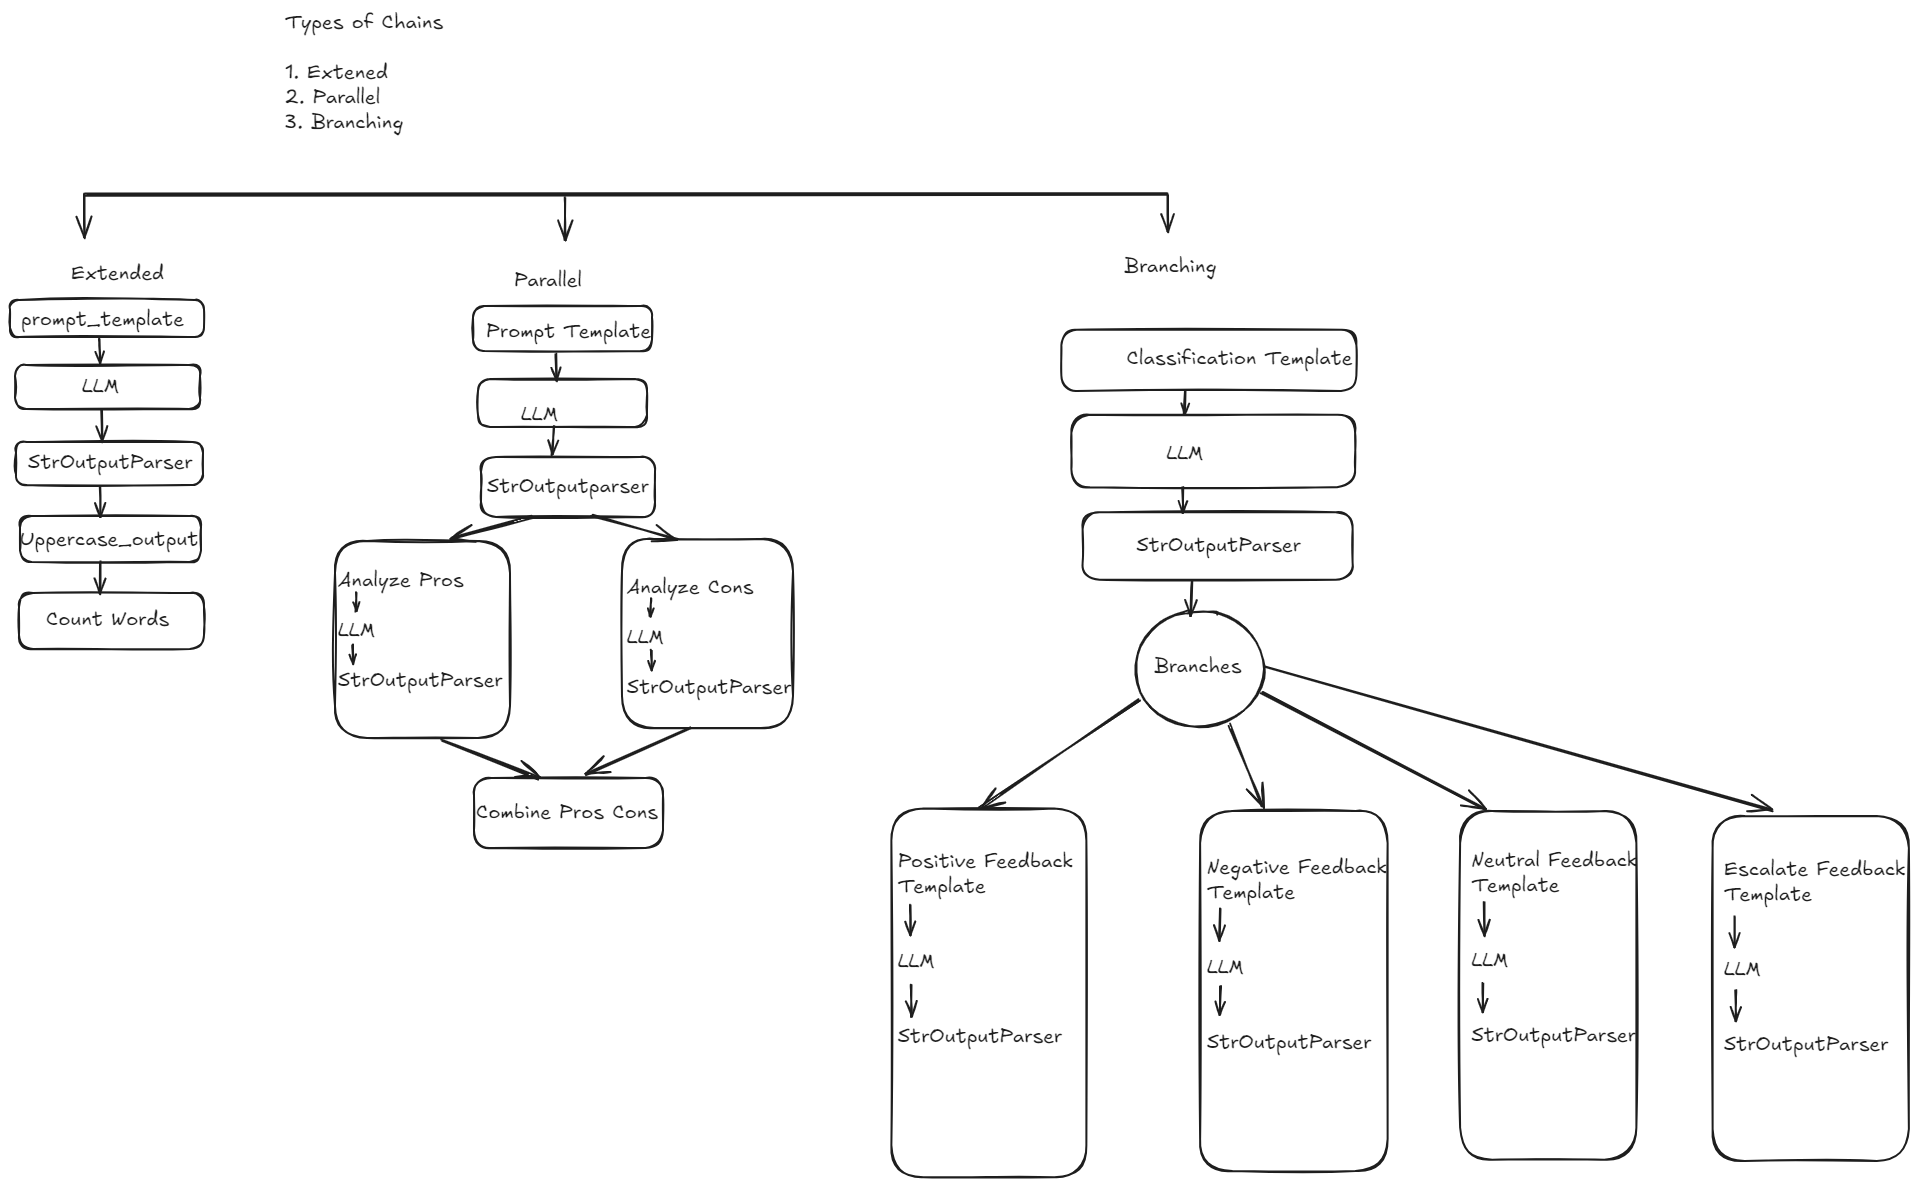

#### Extended

In [27]:
# Define prompt templates
prompt_template = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a comedian who tells jokes about {topic}."),
        ("human", "Tell me {joke_count} jokes."),
    ]
)

# Define additional processing steps using RunnableLambda
uppercase_output = RunnableLambda(lambda x: x.upper())
count_words = RunnableLambda(lambda x: f"Word count: {len(x.split())}\n{x}")

# Create the combined chain using LangChain Expression Language (LCEL)
chain = prompt_template | llm | StrOutputParser() | uppercase_output | count_words

# Run the chain
result = chain.invoke({"topic": "lawyers", "joke_count": 3})

# Output
print(result)

Word count: 78
ALRIGHT, LEGAL BEAGLES, GET READY TO CHUCKLE! HERE ARE THREE LAWYER JOKES JUST FOR YOU:

1. **WHY DON'T SHARKS ATTACK LAWYERS?**  PROFESSIONAL COURTESY. 

2. **WHAT'S THE DIFFERENCE BETWEEN A LAWYER AND A HERD OF BUFFALO?** THE LAWYER CHARGES MORE.

3. **HOW MANY LAWYERS DOES IT TAKE TO CHANGE A LIGHTBULB?**  ONE. BUT IT TAKES A TEAM OF 12 TO BILL FOR IT. 

LET ME KNOW IF YOU NEED MORE MATERIAL FOR YOUR NEXT DEPOSITION... I MEAN, DINNER PARTY! 



#### Parallel

In [28]:
from langchain_core.runnables import RunnableParallel


# Define prompt template
prompt_template = ChatPromptTemplate.from_messages(
    [
        ("system", "You are an expert product reviewer."),
        ("human", "List the main features of the product {product_name}."),
    ]
)


# Define pros analysis step
def analyze_pros(features):
    pros_template = ChatPromptTemplate.from_messages(
        [
            ("system", "You are an expert product reviewer."),
            (
                "human",
                "Given these features: {features}, list the pros of these features.",
            ),
        ]
    )
    return pros_template.format_prompt(features=features)


# Define cons analysis step
def analyze_cons(features):
    cons_template = ChatPromptTemplate.from_messages(
        [
            ("system", "You are an expert product reviewer."),
            (
                "human",
                "Given these features: {features}, list the cons of these features.",
            ),
        ]
    )
    return cons_template.format_prompt(features=features)


# Combine pros and cons into a final review
def combine_pros_cons(pros, cons):
    return f"Pros:\n{pros}\n\nCons:\n{cons}"


# Simplify branches with LCEL
pros_branch_chain = (
    RunnableLambda(lambda x: analyze_pros(x)) | llm | StrOutputParser()
)

cons_branch_chain = (
    RunnableLambda(lambda x: analyze_cons(x)) | llm | StrOutputParser()
)

# Create the combined chain using LangChain Expression Language (LCEL)
chain = (
    prompt_template
    | llm
    | StrOutputParser()
    | RunnableParallel(branches={"pros": pros_branch_chain, "cons": cons_branch_chain})
    | RunnableLambda(lambda x: combine_pros_cons(x["branches"]["pros"], x["branches"]["cons"]))
)

# Run the chain
result = chain.invoke({"product_name": "MacBook Pro"})

# Output
print(result)

Pros:
## MacBook Pro Feature Pros:

Here are the pros of the listed features, broken down by category:

**Performance:**

* **Apple Silicon (M1 Pro/Max/Ultra):**
    * **Pro:** Unmatched performance in its class for demanding tasks like video editing, 3D rendering, and software development.
    * **Pro:**  Offers industry-leading power efficiency, leading to longer battery life.
* **Unified Memory Architecture:** 
    * **Pro:** Eliminates performance bottlenecks by allowing CPU, GPU, and Neural Engine to access the same memory pool. This results in significantly faster data transfer speeds and overall smoother operation, especially with demanding applications.
* **High-Performance GPU:**
    * **Pro:**  Handles graphics-intensive tasks with ease, from professional video editing and 3D modeling to high-resolution gaming.

**Display:**

* **Liquid Retina XDR (on select models):** 
    * **Pro:** Provides an exceptional visual experience with incredibly realistic HDR content, boasting ex

#### Branching

In [32]:
from langchain_core.runnables import RunnableBranch

# Define prompt templates for different feedback types
positive_feedback_template = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        ("human",
         "Generate a thank you note for this positive feedback: {feedback}."),
    ]
)

negative_feedback_template = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        ("human",
         "Generate a response for this negative feedback: {feedback}."),
    ]
)

neutral_feedback_template = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        (
            "human",
            "Generate a message for this neutral feedback: {feedback}.",
        ),
    ]
)

escalate_feedback_template = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        (
            "human",
            "Generate a message for  this feedback to a human agent: {feedback}.",
        ),
    ]
)

# Define the feedback classification template
classification_template = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        ("human",
         "Classify the sentiment of this feedback as positive, negative, neutral, or escalate: {feedback}."),
    ]
)

# Define the runnable branches for handling feedback
branches = RunnableBranch(
    (
        lambda x: "positive" in x,
        positive_feedback_template | llm | StrOutputParser()  # Positive feedback chain
    ),
    (
        lambda x: "negative" in x,
        negative_feedback_template | llm | StrOutputParser()  # Negative feedback chain
    ),
    (
        lambda x: "neutral" in x,
        neutral_feedback_template | llm | StrOutputParser()  # Neutral feedback chain
    ),
    escalate_feedback_template | llm | StrOutputParser()
)

# Create the classification chain
classification_chain = classification_template | llm | StrOutputParser()

# Combine classification and response generation into one chain
chain = classification_chain | branches

# Run the chain with an example review
Goodreview = "The product is excellent. I really enjoyed using it and found it very helpful."
# Bad review - "The product is terrible. It broke after just one use and the quality is very poor."
# Neutral review - "The product is okay. It works as expected but nothing exceptional."
# Default - "I'm not sure about the product yet. Can you tell me more about its features and benefits?"

review = "The product is terrible. It broke after just one use and the quality is very poor."
result = chain.invoke({"feedback": Goodreview})
#result = classification_chain.invoke({"feedback": Goodreview})

# Output the result
print(result)

Dear [Name of person who gave feedback],

Thank you so much for your wonderful feedback! We're thrilled to hear you're enjoying the product. 

It means a lot to us that you found it excellent and helpful. We work hard to deliver a great experience, and your positive words are incredibly motivating for the entire team.

We especially appreciate you taking the time to share your thoughts. It helps us know we're on the right track.

Sincerely, 

[Your Name/Team Name] 

